<a href="https://colab.research.google.com/github/MaiPri/techlabs_group_3_clownfishes/blob/main/timeSeriesForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pystan prophet #for time series

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 68.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.8 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from prophet import Prophet

In [3]:
df = pd.read_csv("charging_data.csv")

In [ ]:
#INFO 2 ----------

#Time series forecasting - is the task of predicting future values based on historical data.
#Prophet needs the df to have unique values for the two columns. In our case will be Dates (x) and anzahl_ladepunkte (y)

#inbetriebnahmedatum (2017-01-02) is an object and we need it to be a date-time value
#df.dtypes

In [4]:
df["inbetriebnahmedatum"]= pd.to_datetime(df["inbetriebnahmedatum"]) #now is a datetime type
#df.dtypes

In [5]:
#create a df with just 2 columns
fcstdf = df[["inbetriebnahmedatum","anzahl_ladepunkte"]]
fcstdf.columns = ["ds","y"]

In [6]:
#train the model
m = Prophet(interval_width=0.95, daily_seasonality=True)
#confidence of 95% and daily true because the data has days
model = m.fit(fcstdf)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpe26lvjhh/qrrebhu4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe26lvjhh/dksye7sb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39999', 'data', 'file=/tmp/tmpe26lvjhh/qrrebhu4.json', 'init=/tmp/tmpe26lvjhh/dksye7sb.json', 'output', 'file=/tmp/tmpe26lvjhh/prophet_modelqjuvdowt/prophet_model-20240314212734.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:27:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:27:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [7]:
#forecast
future = m.make_future_dataframe(periods=600,freq="D") # I am not sure about periods and frequency. Is daily maybe too much?
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-10-01,1.210552,1.039781,3.108257,1.210552,1.210552,0.863880,0.863880,0.863880,0.848965,...,0.009821,0.009821,0.009821,0.005094,0.005094,0.005094,0.0,0.0,0.0,2.074432
1,2001-01-21,1.179142,1.071490,3.171446,1.179142,1.179142,0.916818,0.916818,0.916818,0.848965,...,0.013446,0.013446,0.013446,0.054406,0.054406,0.054406,0.0,0.0,0.0,2.095960
2,2007-05-01,1.155424,1.029548,3.098623,1.155424,1.155424,0.878487,0.878487,0.878487,0.848965,...,0.013785,0.013785,0.013785,0.015738,0.015738,0.015738,0.0,0.0,0.0,2.033912
3,2007-12-21,1.153002,0.930665,3.142839,1.153002,1.153002,0.861919,0.861919,0.861919,0.848965,...,-0.017770,-0.017770,-0.017770,0.030724,0.030724,0.030724,0.0,0.0,0.0,2.014921
4,2008-07-19,1.150817,0.929265,3.031259,1.150817,1.150817,0.838656,0.838656,0.838656,0.848965,...,-0.050995,-0.050995,-0.050995,0.040686,0.040686,0.040686,0.0,0.0,0.0,1.989474


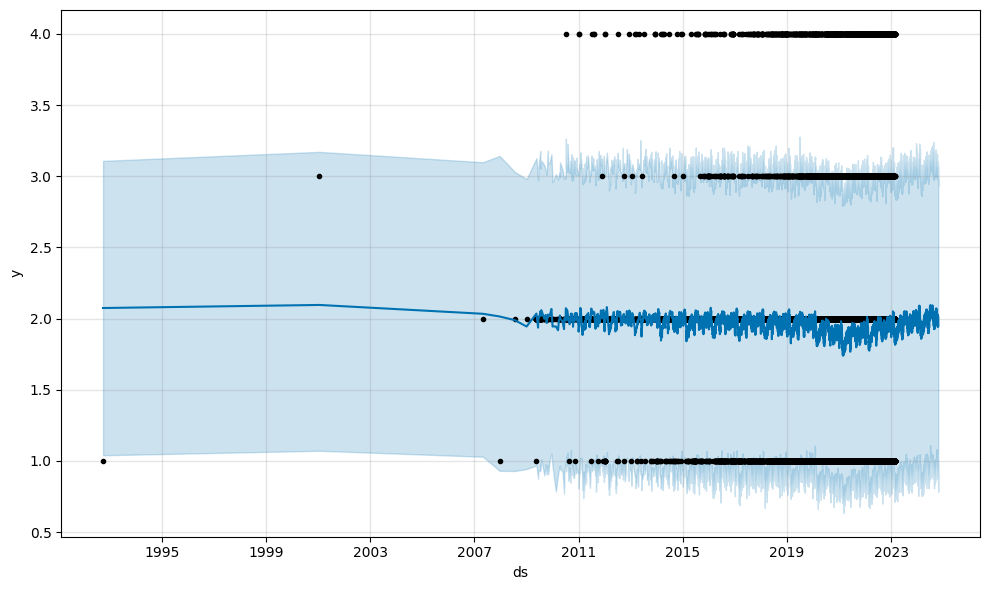

In [8]:
plotl=m.plot(forecast)

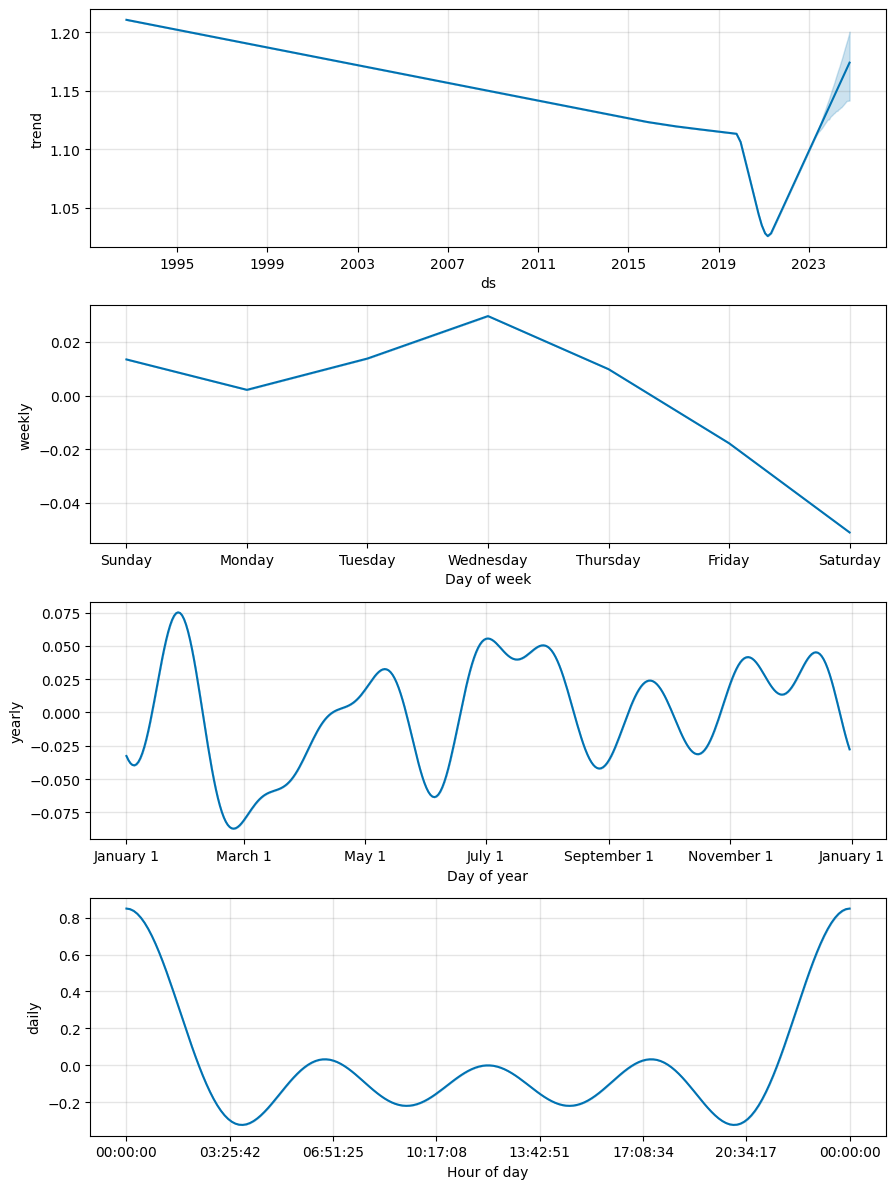

In [9]:
plot2=m.plot_components(forecast)